<a href="https://colab.research.google.com/github/willian2610/Processamento-de-Sinais/blob/master/Aula%2001%20-%20Sinais%20Cont%C3%ADnuos%20e%20Discretos%20(Willian%20de%20Vargas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Material elaborado por Willian de Vargas, com base nos materiais disponibilizados pela Professora Dra. Carla Diniz L. Becker, durante as aulas de Processamento de Sinais, ministradas para o curso de Informática Biomédica da Universidade Federal de Ciências da Saúde de Porto Alegre.

# Aula 01 - Sinais Contínuos e Discretos

Bibliotecas necessárias:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as tck

plt.style.use('ggplot') # aplica um estilo aos plots, que será aplicado a partir de agora automaticamente.
plt.rcParams['figure.figsize'] = [14, 5] #estabelece o tamanho da figura (FAÇA O AJUSTE DE ACORDO COM O TEu MONITOR)

#I. Teoria:

## Introdução:

O objetivo de procssar sinais digitais é extrair deles informações úteis. Contudo, na maioria das vezes, a informação que se busca **não está explicitada no domínio do tempo** e, portanto, obtê-la não é das tarefas mais simples.

Na maioria dos casos, a informação que se busca é evidenciada no **domínio da frequência**.

### **Conceitos Básicos:**



#### **Frequência angular:**
Definida por $\omega_0$ quando o sinal for contínuo e por $\Omega_0$ quando o sinal for discreto. Deve ser sempre representada pela unidade $rad/s$. Sua definição é:

**Sinal contínuo:**
* $\omega_0=2\pi f_0 = \frac{2\pi}{T_0} rad/s$

**Sinal discreto:** 
* $\Omega_0=\frac{2\pi}{N} rad/s$

---

#### **Frequência do sinal:**
Definida por $f_0$ e deve ser representada pela unidade $Hz$. Sua definição é:

* $f_0=\frac{\omega_0}{2\pi}$

---

#### **Frequência de amostragem:**
Definida por $f_s$ e deve ser representada pela unidade $s$. Sua definição é:

* $f_s=\frac{1}{T_s}$

---

#### **Período fundamental:**
É definido por $T_0$ e deve ser representado pela unidade $s$. Sua definição é:

* $T_0=\frac{2\pi}{\omega_0}$

---

#### **Período de amostragem:**
É definido por $T_s$ e deve ser representado pela unidade $s$. Sua definição é:

* $T_s=\frac{1}{f_s}$

## Sinal Contínuo:

Um sinal diz-se um **sinal contínuo** quando a variável independente é contínua.


### Exemplo 01:
O sinal $x(t)$, definido por $x(t) = cos(t)e^{-0.1t}$ com $t \in \mathbb{R}$, cuja evolução para $0 \leq t \leq 20 $.
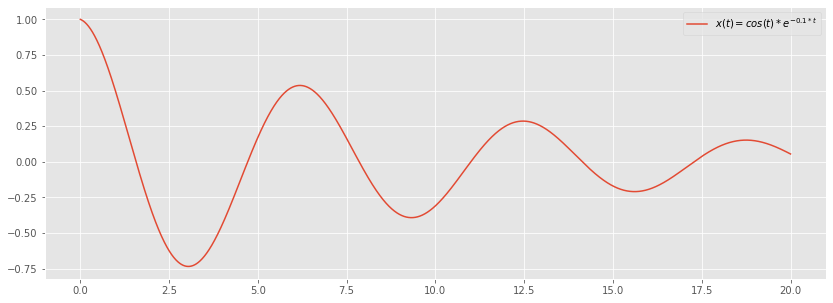

### Sinal subamortecido:

Natureza oscilatória da resposta. A resposta é zero nos pontos onde a senóide é zero, que são determinadas pela frequência amortecida.

**Exemplo de tensão subamortecida:**

* $v(t) = 5e^{-t}sen(3t)$

* Funções envelopes: $5e^{-t}$ e $-5e^{-t}$


**Para calcular o período fundamental ($T_0$):**
* Definição de função periódica: $f(t) = f(t+T_0)$
* Logo:
  * $5e^{-t}sen(3t)=5e^{-t}sen(3(t+T_0))$
  * $sen(3t)=sen(3t+3T_0))$
* Como o período fundamental de $sen(x)$ é igual a $2\pi$, então:
  * $3T_0=2\pi$
  * $T_0=\frac{2\pi}{3}$

**Damping ou Amortecimento(${\omega_d}):$**

* $\omega_d = 2\pi f_0$
  * $f_0 = \frac{1}{T_0}$
* $\omega_d = 2\pi\frac{1}{T_0}$ → $\omega_d = \frac{2\pi}{T_0}$
* $\omega_d = 2\pi f_0$ → $\omega_d = \frac{2\pi}{T_0}$ 
* $\omega_d = \frac{2\pi}{\frac{2\pi}{3}}=3$ 

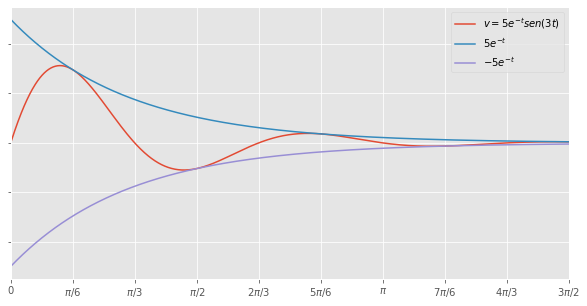

In [ ]:

t = np.linspace(0, 3*np.pi/2, 1000) # (start, stop, number of samples)

v_t = 5*np.exp(-t)*np.sin(3*t)
env_1 = 5*np.exp(-t)
env_2 = -5*np.exp(-t)

# Creates the labes for x axis in radian scale.
tick_pos= [0, np.pi/6, np.pi/3, np.pi/2 ,2*np.pi/3, 5*np.pi/6, np.pi, 7*np.pi/6, 4*np.pi/3, 3*np.pi/2]
labels = ['0', '$\pi/6$', '$\pi/3$', '$\pi/2$', '$2\pi/3$', '$5\pi/6$', '$\pi$', '$7\pi/6$', '$4\pi/3$', '$3\pi/2$']

# Plotting the equations
plt.figure(figsize=(10,5))
plt.xlim(0, 3*np.pi/2)
plt.plot(t, v_t, label="$v = 5e^{-t}sen(3t)$")
plt.plot(t, env_1, label="$5e^{-t}$")
plt.plot(t, env_2, label="$-5e^{-t}$")

plt.xticks(tick_pos, labels)
plt.gca().axes.yaxis.set_ticklabels([]) # Remove values from y axis without removing the lines.
plt.legend() # Show equations legends
plt.show()


## Sinais Amostrados:

Muitos dos sinais que estamos interessaods em analisar resultam da observação das características de sinais contínuos, comeadamente a sua amplitude, em instantes de tempo uniformemente espaçãdos $t_n = nT_s$, em que $T_s$ representa o **período de amostragem** e $n$ é um número **inteiro**. Utilizaremos esta notação:

$x[n] = x(nT_s)$, $n = 0, \pm1, \pm2, ...$

A grandeza inversa do período de amostragem é designada por **frequência de amostragem**

$f_s=\frac{1}{T_s}$

Dizendo-se que o sinal contínuo está a ser **amostrado**, ou seja, que estão a ser recolhidas amostras, à frequência $f_s$.

O sinal discreto $x[n]=cos(n)e^{-0.1n}$, é o sinal discreto resultante da amostragem do sinal contínuo $x(t)=cos(t)e^{-0.1t}$, com um período de amostragem $T_s=1s$, ou seja, com uma frequência de amostragem $f_s=\frac{1}{T_s}=\frac{1}{1}=1Hz$.

## Sinal Discreto:

Um sinal diz-se um **sinal discreto** quando a variável independente é discreta.


### Exemplo 01: 
O sinal $x[n]$, definido por $x[n]=cos(n)e^{-0.1n}$ com $n \in \aleph$, cuja evolução para $0 \leq n \leq 20$.

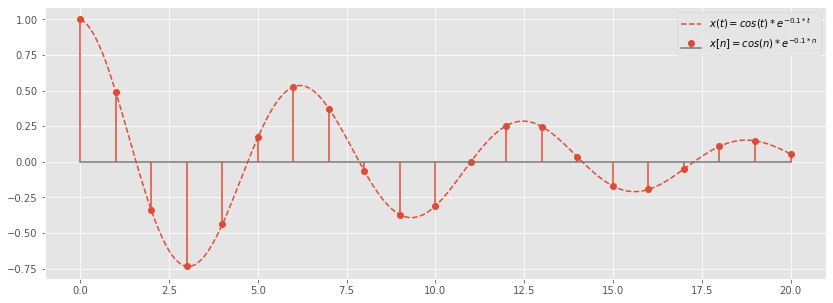

### Exemplo 02:

Da amostragem do sinal $x(t)=cos(t)e^{-0.1t}$ com uma frequência de amostragem $f_s=2Hz$, ou seja, com um período de amostragem $T_s=\frac{1}{f_s}=0.5s$, resulta o sinal discreto $x[n]=cos(nT_s)e^{-0.1nT_s}=cos(0.5n)e^{-0.05n}$ cuja evolução para $0 \leq n \leq 40$. 

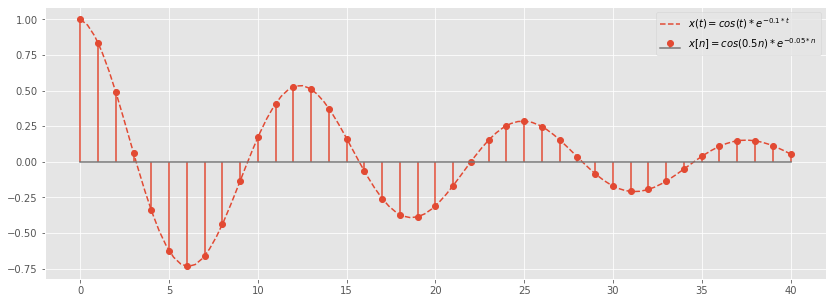

## Sinais Periódicos e Não Periódicos:

### Sinais Contínuos Periódicos:

Um sinal contínuo, $x(t)$, diz-se um **sinal periódico** se satisfaz a condição $x(t)=x(t+T_0), \forall t$ em que $T_0$ é uma constante positiva.

* Em outras palavras, um sinal periódico tem a propriedade de não se modificar pelo deslocamento do tempo $T_0$.

O menor valor positivo de $T_0$ que satisfaz a condição é designado por **período fundamental** do sinal, vulgarmente designado apenas por **período** do sinal. O inverso do período é designado por **frequência** do sinal.

* $f_0=\frac{1}{T_0}$

E o correspondente valor angular é designado por **frequência angular** do sinal.

* $\omega_0=2\pi f_0 = \frac{2\pi}{T_0}$

Um sinal para o qual não exista nenhum valor $T_0$ tal que $x(t)=x(t+T_0), \forall t$, diz-se um **sinal não periódico** ou **sinal aperiódico**.

### Sinais Discretos Periódicos:

Um sinal discreto, $x[n]$, diz-se um **sinal periódico** se satisfaz a condição $x[n]=x(n+N), \forall n$ em que $N$ é um inteiro positivo.

* Em outras palavras, um sinal discreto periódico tem a propriedade de não se modificar pelo deslocamento de $N$ amostras. 

O menor valor de $N$ que satisfaz a condição é designado por **período fundamental** do sinal. No caso discreto a frequência angular é representada pelo carácter maiúsculo ($\Omega_0$).

* $\Omega_0=\frac{2\pi}{N}$

Caso o sinal discreto resulte da amostragem de um sinal contínuo, temos $T_0=NT_s$, ou seja:

* $\Omega_0=\frac{2\pi}{N}=2\pi\frac{T_s}{T_0}=\omega_0 T_s=2\pi\frac{f_0}{f_s}$

#II. Prática:

## Construindo um sinal contínuo

**Usando a função linspace:**

Linspace retorna números espaçados de modo uniforme em um intervalo. Dessa forma, dado um ponto inicial e de parada, assim como a quantidade de valores, linspace irá distribuí-los UNIFORMEMENTE para você em uma matriz NumPy. 




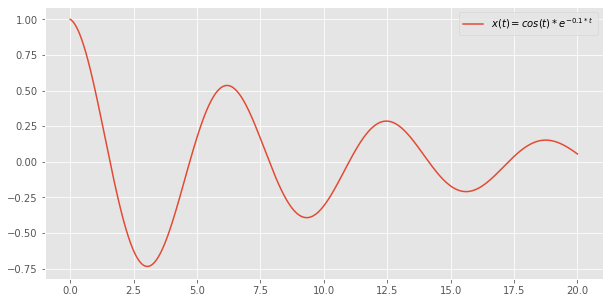

In [ ]:
t = np.linspace(0, 20, 10000) # (start, stop, number of samples)
sinal_continuo = np.cos(t) * np.exp(-0.1 * t)

plt.figure(figsize=(10,5))
plt.plot(t, sinal_continuo, label="$x(t) = cos(t)*e^{-0.1*t}$")
plt.legend()
plt.show()

## Construíndo um sinal discreto

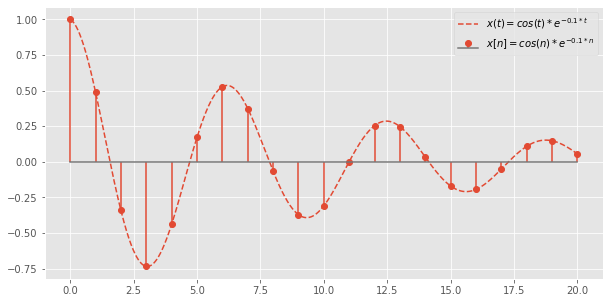

In [ ]:
# Definindo o numero de amostras
n = np.linspace(0, 20, 21) # (start, stop, number of samples)
sinal_discreto = np.cos(n) * np.exp(-0.1 * n)

plt.figure(figsize=(10,5))
plt.plot(t, sinal_continuo, '--', label="$x(t) = cos(t)*e^{-0.1*t}$") # Plotando o sinal contínuo para comparação
plt.stem(n, sinal_discreto, use_line_collection=True, label="$x[n] = cos(n)*e^{-0.1*n}$")
plt.legend()
plt.show()

## Exercício 1: Amostrando um sinal contínuo

Amostrando um sinal $x(t)=cos(t)e^{-0.1t}$ com uma frequência de amostragem de 2 Hz.

**Sinal contínuo: $x(t)$** 

$x(t)=cos(t)e^{-0.1t}$

Frequência de amostragem: $f_s = 2Hz$

Período de amostragem: $T_s = \frac{1}{f_s} = \frac{1}{2} = 0.5$

**Sinal discreto: $x[n]$**
1.   Substitui $t$ por $n*T_s$
  * $x[n]=cos(n*T_s)e^{-0.1*n*T_s}$ 




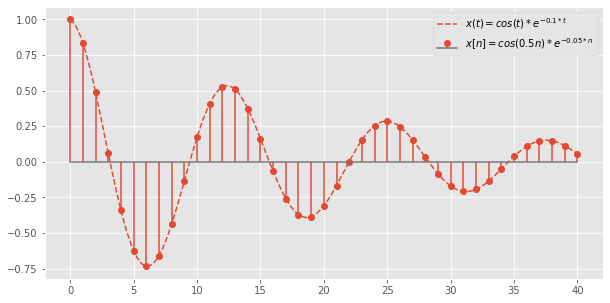

In [ ]:
t = np.linspace(0, 20, 100) # (start, stop, number of samples)
n = np.linspace(0, 40, 41) # (start, stop, number of samples)

sinal_continuo = np.cos(t)*np.exp(-0.1*t)

f_s = 2 # Frequencia de amostragem
t_s = 1/f_s # Período de amostragem

sinal_discreto = np.cos(n*t_s)*np.exp(-0.1*n*t_s)

plt.figure(figsize=(10,5))
plt.plot(t*2, sinal_continuo, '--', label="$x(t) = cos(t)*e^{-0.1*t}$")
plt.stem(n, sinal_discreto, use_line_collection=True, label="$x[n] = cos(0.5n)*e^{-0.05*n}$")
plt.legend()
plt.show()

## Sinais Periódicos e Não-Periódicos

### Deslocando um sinal periódico na horizontal (mexendo na FASE) por um número definido por b.

**Ex.:**

**Sinal:** $x(t) = sen(t)$

**Deslocamento desejado:** $0.5*\pi$

**Deslocando o sinal:** $x(t) = sen(t+(0.5*\pi))$

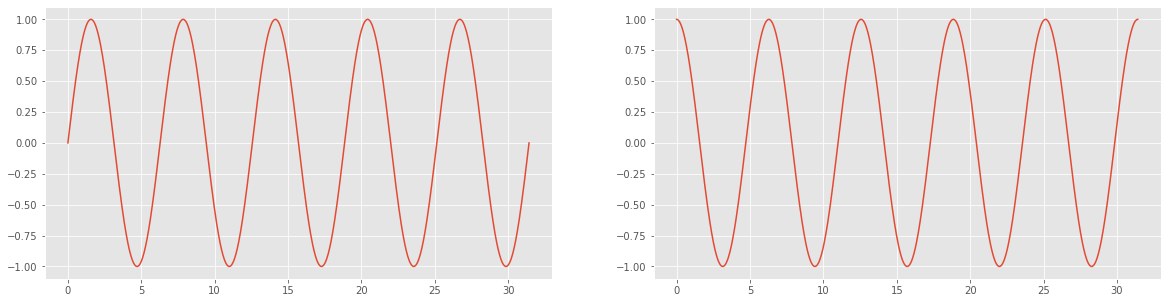

In [ ]:
t = np.linspace(0, 5 * 2 * np.pi, 1000) # start = 0, stop = 5*2*pi (5 períodos), 1000 amostras

# Valor do deslocamento
b = 0.5* np.pi

# Sinal 01 (original)
x1 = np.sin(t)

# Deslocado o sinal
x2 = np.sin(t + np.abs(b)) # np.abs(b) retorna o valor absoluto de b

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(t, x1)
plt.subplot(1,2,2)
plt.plot(t, x2)

plt.show()


### Deslocando um sinal não-periódico no tempo por um número de períodos b:

**Ex.:**

**Sinal:** $x(t) = sen(t)*e^{-0,1*t}$

**Deslocamento desejado:** $5*\pi$

**Deslocando o sinal:** $x(t) = sen(t+(5*\pi))*e^{-0,1*(t+(5*\pi))}$

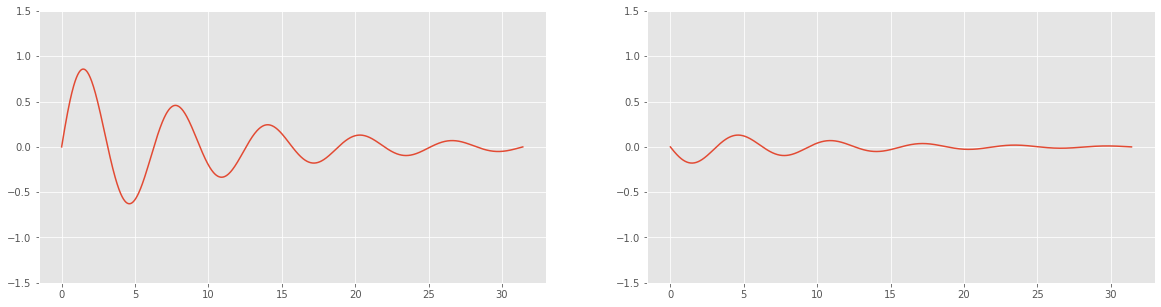

In [ ]:
# Deslocamento 
b = 5*np.pi

t = np.linspace(0, 5 * 2*np.pi, 1000) # start = 0, stop = 5*2*pi (5 períodos), 1000 amostras

# Sinal original
y_original =  np.sin(t) * np.exp(-0.1*t)

# Sinal deslocado
y_deslocado =  np.sin(t + np.abs(b)) * np.exp(-0.1*(t + np.abs(b)))

plt.figure(figsize=(20,5))

plt.subplot(121)
plt.plot(t, y_original)
plt.ylim(-1.5, 1.5)

plt.subplot(122)
plt.plot(t, y_deslocado)
plt.ylim(-1.5, 1.5)

plt.show()

## Exercício 2: Construindo o sinal contínuo

Construindo o sinal contínuo para $x(t) = cos(10\pi*t)$

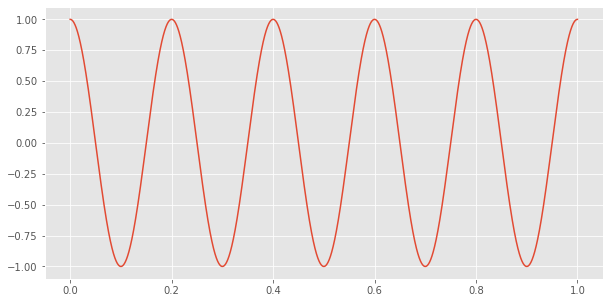

In [ ]:
t = np.linspace(0, 1, 10000)
x = np.cos(10 * np.pi * t)

plt.figure(figsize=(10,5))
plt.plot(t, x)
plt.show()

## Exercício 3: Discretizar sinal contínuo


Considere o sinal contínuo: $x(t) = cos(10\pi*t)$

* Calcule a sua Frequência angular, Frequência e Período fundamental.
* Escreva a expressão do sinal discreto resultante da amostragem do sinal $x(t)$ com uma frequência de amostragem $fs_k=kf_0$ e calcule a sua Frequência angular e Período.
* Particularize a expressão para $k=2$, $k=4$ e $k=6$
  * Para cada valor de k, calcule a frequência angular e o período dos sinais discretos.


**OBTENDO FREQÊNCIA ANGULAR, FREQUÊNCIA DO SINAL E PERÍODO:**

**Frequência Angular($\omega_0$):**
* Propriedade: $cos(10\pi*t) = cos(\omega_0*t+\theta_0)$
  * $\omega_0 = 10\pi rad/s$

**Frequência do sinal ($f_0$):**
* $\omega_0 = 2\pi*f_0$
* $\frac{\omega_0}{2\pi} = f_0$
* $\frac{10\pi}{2\pi} = f_0$
* $5Hz = f_0$

**Período de fundamental ($T_0$):**
* $T_0 = \frac{2\pi}{\omega_0}$
* $T_0 = \frac{2\pi}{10\pi}$
* $T_0 = \frac{2}{10}$
* $T_0 = 0.2 s$


**DISCRETIZANDO O SINAL CONTÍNUO: $x(t) = cos(10\pi*t)$**


Reescrevendo a função utilizando a propriedade: $cos(\pi*t) = cos(\omega_0*t+\theta_0)$

$x(t) = cos(10\pi*t) = cos( \omega_0*t)$

**Substitua:**

$\omega_0 = 2\pi*f_0$

* $x(t) = cos(2\pi*f_0*t)$ → Sinal contínuo pronto para ser discretizado.

$t = nT_s$

* $x[n] = cos[2\pi*f_0*nT_s]$ → Sinal discretizado. Agora, falta manipular esta função conforme abaixo.

**Manipulando:**

$T_s = \frac{1}{f_s}$

$x[n] = cos[2\pi*f_0*n*\frac{1}{f_s}] = cos[2\pi*\frac{f_0}{f_s}*n]$

(Considerando $fs_k = k*f_o$): $k = \frac{fs}{f0}$ → $\frac{f0}{fs}=\frac{1}{k}$

$x[n] = cos[2\pi*\frac{1}{k}*n] = cos[\frac{2\pi}{k}*n]$ 

**→ EXPRESSÃO DO SINAL DISCRETIZADO: $x[n] = cos[\frac{2\pi}{k}*n]$**



**DEFINIÇÕES DE PERÍODO, FREQUÊNCIA ANGULAR E PERÍODO DE AMOSTRAGEM:**

Propriedade:
$$\omega_0=\Omega_0=2\pi*\frac{f_0}{f_s}=\frac{2\pi}{k} \therefore N=\frac{2\pi}{\Omega_0}=k$$

* $N = \frac{2\pi}{\Omega_0} = k$,  Portanto: 
  * $N=k$ ← **Período**
  * $k = \frac{2\pi}{\Omega_0}$ → $k*\Omega_0=2\pi$ → $\Omega_0 = \frac{2\pi}{k}$ ← **Frequência angular**

* $T_s = \frac{1}{N*f_0}$ ← **Período de amostragem**

---

**PARTICULARIZANDO A EXPRESSÃO PARA $k = 2, 4, 6$:**

**k = 2**
* Período:
  * $N = k$ → $N=2$
* Período de amostragem:
  * $T_s = \frac{1}{N*f_0} = \frac{1}{2*5} = \frac{1}{10} = 0.1 s$
* Frequência Ângular:
  * $\Omega_0 = \frac{2\pi}{k} = \frac{2\pi}{2} = \pi rad/s$

Para $N=2$ temos duas amostras por ciclo completo, ou seja, o período (ou tempo entre amostras) é de $0.1s$.

**k = 4**
* Período:
  * $N = k$ → $N=4$
* Período de amostragem:
  * $T_s = \frac{1}{N*f_0} = \frac{1}{4*5} = \frac{1}{20} = 0.05 s$
* Frequência Ângular:
  * $\Omega_0 = \frac{2\pi}{k} = \frac{2\pi}{4} = \frac{\pi}{2} rad/s$

Para $N=4$ temos quatro amostras por ciclo completo, ou seja, o período (ou tempo entre amostras) é de $0.05s$.

**k = 6**
* Período:
  * $N = k$ → $N=6$
* Período de amostragem:
  * $T_s = \frac{1}{N*f_0} = \frac{1}{6*5} = \frac{1}{30} = 0.033 s$
* Frequência Ângular:
  * $\Omega_0 = \frac{2\pi}{k} = \frac{2\pi}{6} = \frac{\pi}{3} rad/s$

Para $N=6$ temos seis amostras por ciclo completo, ou seja, o período (ou tempo entre amostras) é de $0.33s$.

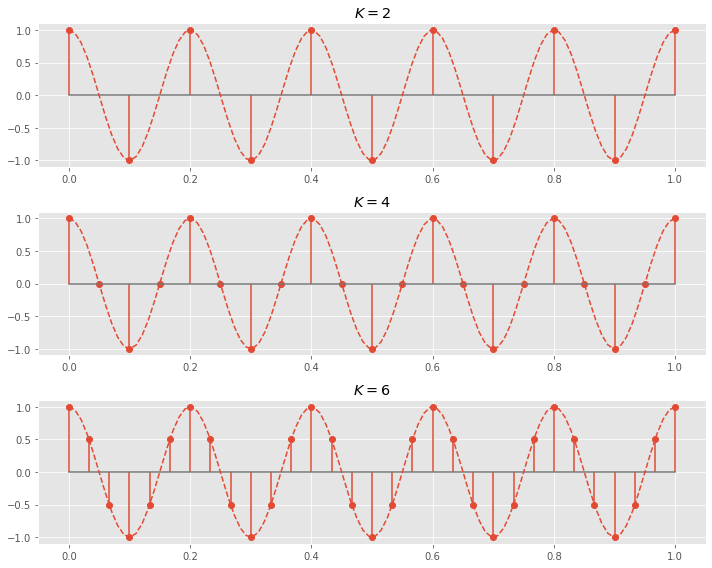

In [ ]:
N = 1
f0 = 5

t = np.linspace(0, N, 100)
x_c = np.cos(2 * np.pi * t * f0)

plt.figure(figsize=(10,8))

# K = 2

k = 2
n = np.linspace(0, N*k*f0, (N*k*f0)+1)
x_d = np.cos(((2*np.pi)/k) * n)  # Equação calculada no exercício de discretização

plt.subplot(3,1,1)
plt.title("$K=2$")
plt.stem(n/(f0*k), x_d,use_line_collection=True)
plt.plot(t, x_c, '--')

# K = 4

k = 4
n = np.linspace(0, N*k*f0, (N*k*f0)+1)
x_d = np.cos(((2*np.pi)/k) * n)  # Equação calculada no exercício de discretização

plt.subplot(3,1,2)
plt.title("$K=4$")
plt.stem(n/(f0*k), x_d,use_line_collection=True)
plt.plot(t, x_c, '--')

# K = 6

k = 6
n = np.linspace(0, N*k*f0, (N*k*f0)+1)
x_d = np.cos(((2*np.pi)/k) * n)  # Equação calculada no exercício de discretização

plt.subplot(3,1,3)
plt.title("$K=6$")
plt.stem(n/(f0*k), x_d,use_line_collection=True)
plt.plot(t, x_c, '--')

plt.tight_layout()
plt.show()